Mathematical Transformation

* log transformer
* Reciprocal
* Power

Normal Distribution


Function tranformer
* Log
* Reciprocal

Power
* Box

In [ ]:
import pandas as pd

import scipy.stats as stats

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])

In [ ]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [ ]:
df.isnull().sum()

,0
Survived,0
Age,0
Fare,0


In [ ]:
x = df.drop('Survived', axis=1)
y = df['Survived']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train.head()

,Age,Fare
331,45.5,28.5000
733,23.0,13.0000
382,32.0,7.9250
704,26.0,7.8542
813,6.0,31.2750


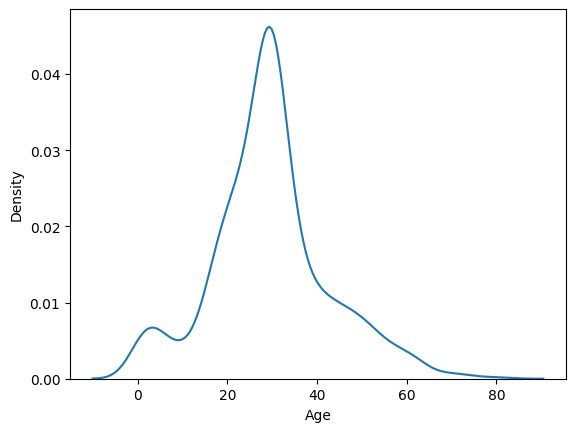

In [ ]:
sns.kdeplot(x='Age', data=x_train)
plt.show()

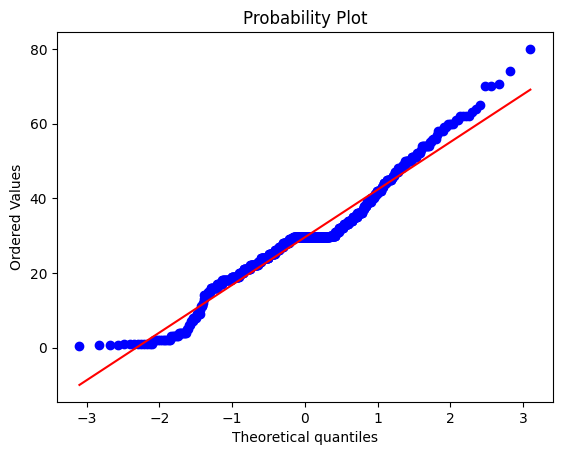

In [ ]:
stats.probplot(x_train['Age'], dist='norm', plot=plt)
plt.show()

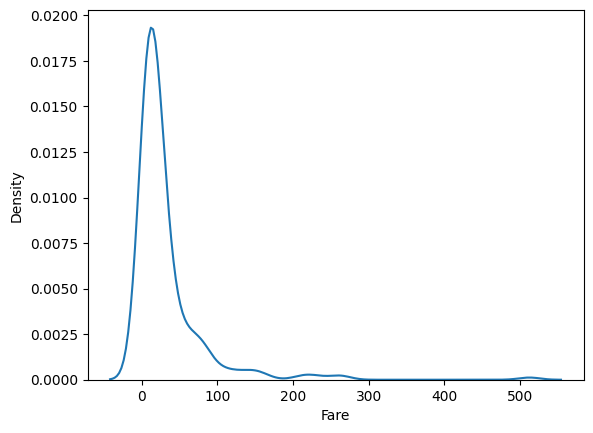

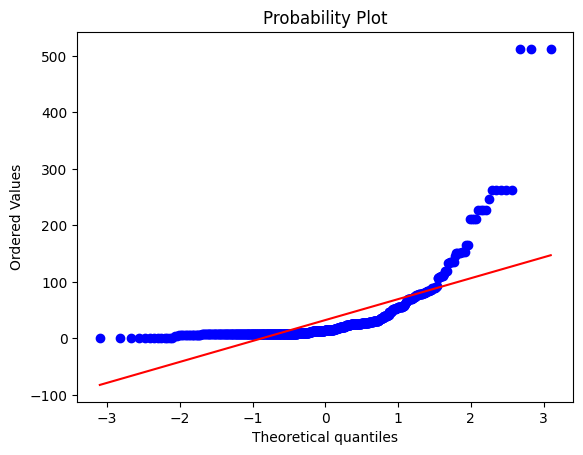

In [ ]:
sns.kdeplot(x='Fare', data=x_train)
plt.show()

stats.probplot(x_train['Fare'], dist='norm', plot=plt)
plt.show()

In [ ]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [ ]:
clf.fit(x_train, y_train)
clf2.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = clf.predict(x_test)
y_pred2 = clf2.predict(x_test)

In [ ]:
score = accuracy_score(y_test, y_pred)
score2 = accuracy_score(y_test, y_pred2)

In [ ]:
print(score)
print(score2)

0.6480446927374302
0.6703910614525139


In [ ]:
import numpy as np

trf = FunctionTransformer(func=np.log1p)

In [ ]:
x_train_trf = trf.fit_transform(x_train)
x_test_trf = trf.transform(x_test)

In [ ]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_trf, y_train)
clf2.fit(x_train_trf, y_train)

y_pred = clf.predict(x_test_trf)
y_pred2 = clf2.predict(x_test_trf)

score = accuracy_score(y_test, y_pred)
score2 = accuracy_score(y_test, y_pred2)

print(score)
print(score2)

0.6815642458100558
0.6815642458100558


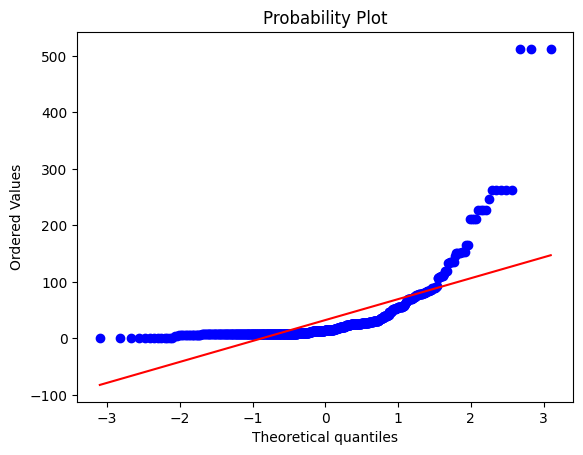

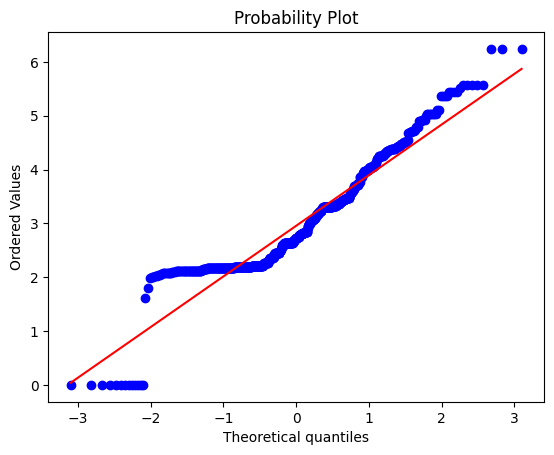

In [ ]:
stats.probplot(x_train['Fare'], dist='norm', plot=plt)
plt.show()

stats.probplot(x_train_trf['Fare'], dist='norm', plot=plt)
plt.show()

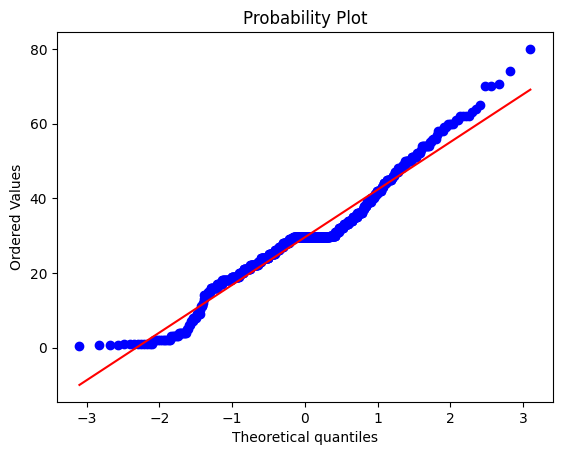

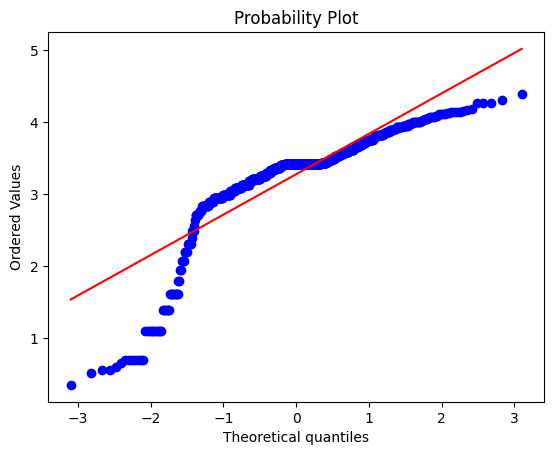

In [ ]:
stats.probplot(x_train['Age'], dist='norm', plot=plt)
plt.show()

stats.probplot(x_train_trf['Age'], dist='norm', plot=plt)
plt.show()

In [ ]:
x_train_trf = None
x_test_trf = None

trf2 = ColumnTransformer([
    ('log', FunctionTransformer(np.log1p), ['Fare'])
], remainder='passthrough')

x_train_trf = pd.DataFrame(trf2.fit_transform(x_train), columns=['Fare', 'Age'])
x_test_trf = pd.DataFrame(trf2.transform(x_test), columns=['Fare', 'Age'])

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_trf, y_train)
clf2.fit(x_train_trf, y_train)

y_pred = clf.predict(x_test_trf)
y_pred2 = clf2.predict(x_test_trf)

score = accuracy_score(y_test, y_pred)
score2 = accuracy_score(y_test, y_pred2)

print(score)
print(score2)

0.6703910614525139
0.6480446927374302


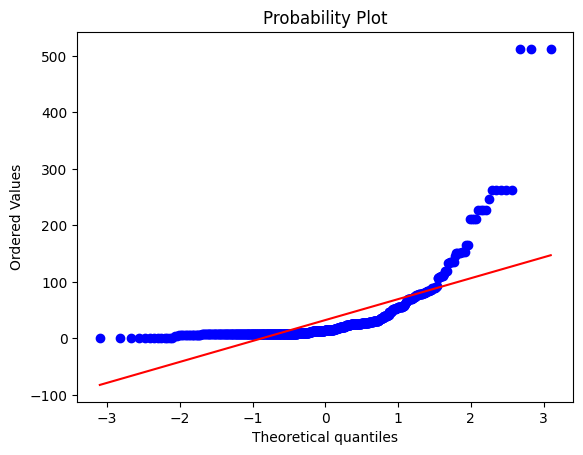

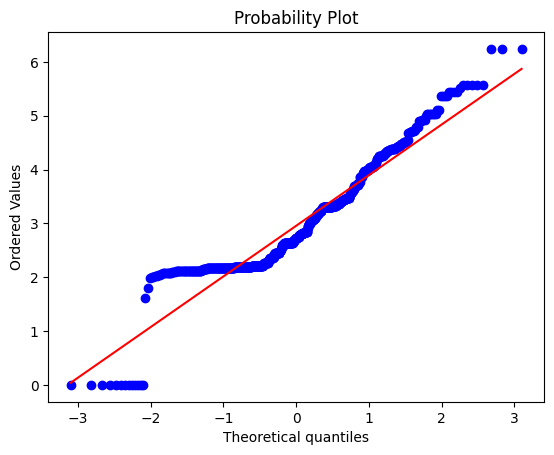

In [ ]:
stats.probplot(x_train['Fare'], dist='norm', plot=plt)
plt.show()

stats.probplot(x_train_trf['Fare'], dist='norm', plot=plt)
plt.show()

In [ ]:
from sklearn.preprocessing import PowerTransformer

In [ ]:
concrete = pd.read_csv('concrete_data.csv')
concrete.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
concrete.isnull().sum()

,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
Strength,0


In [ ]:
concrete.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [ ]:
x = concrete.drop('Strength', axis=1)
y = concrete['Strength']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(x_test)
r2_score(y_test, y_pred)

0.627553179231485

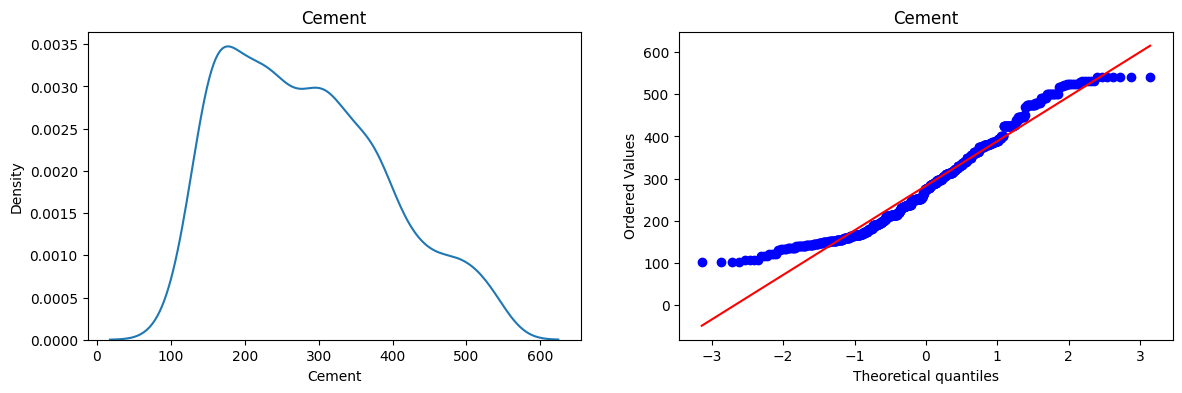

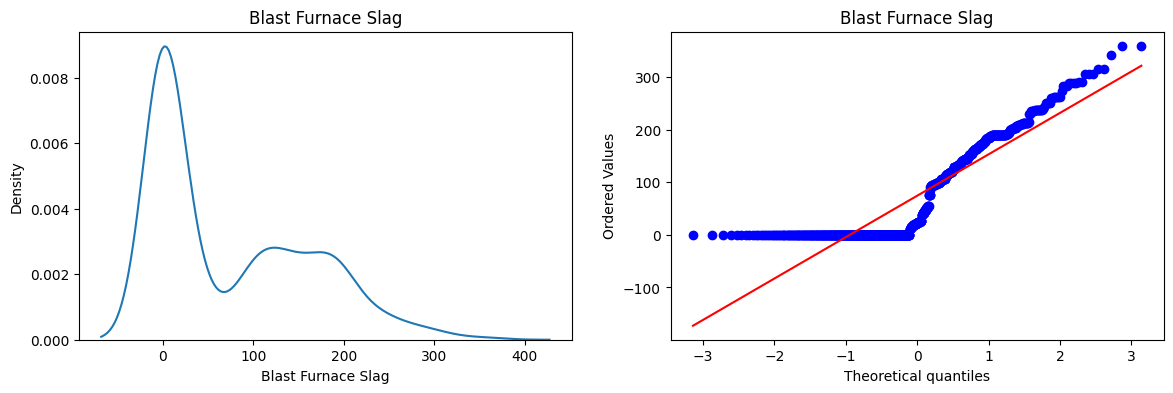

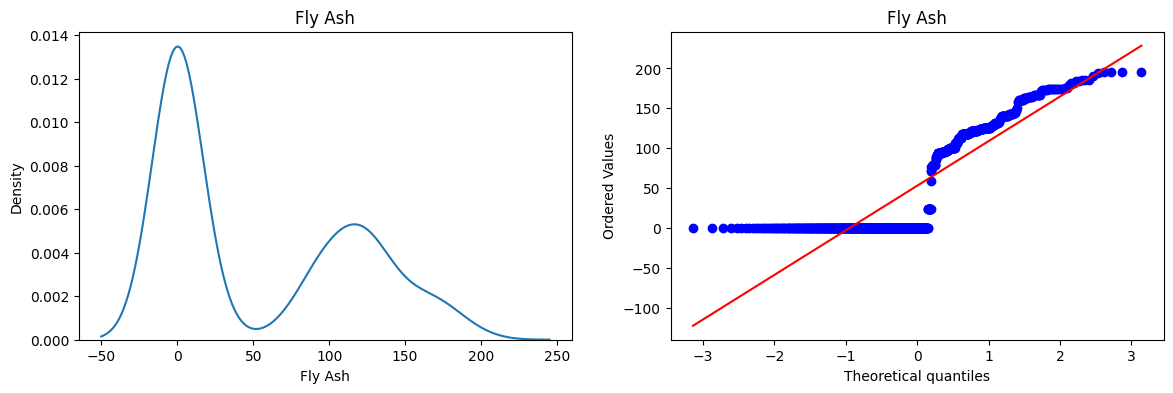

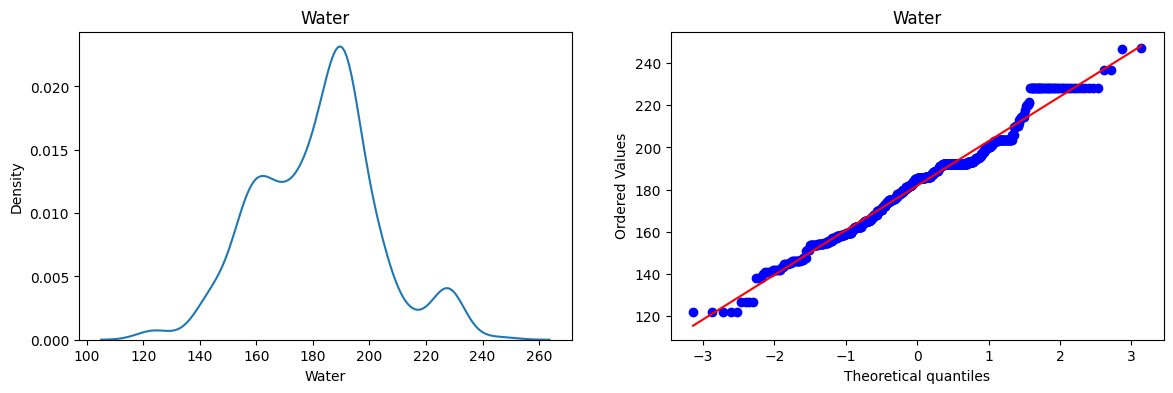

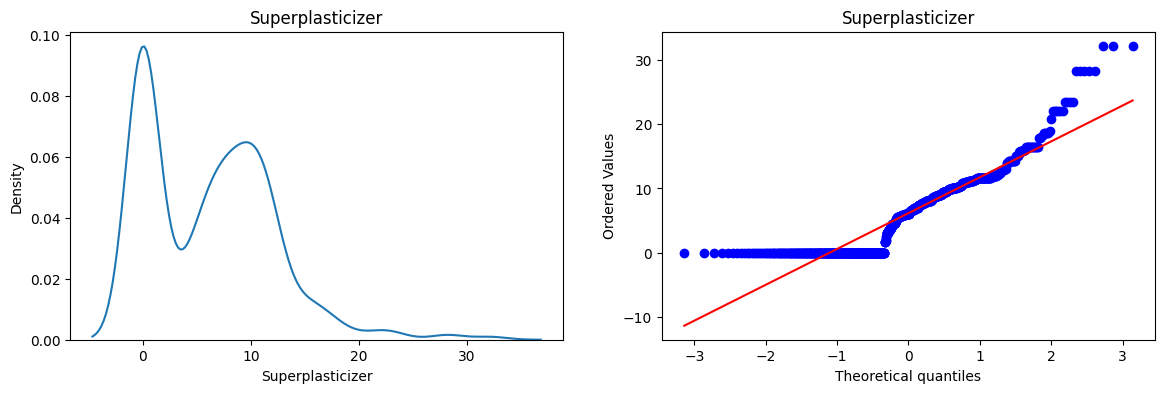

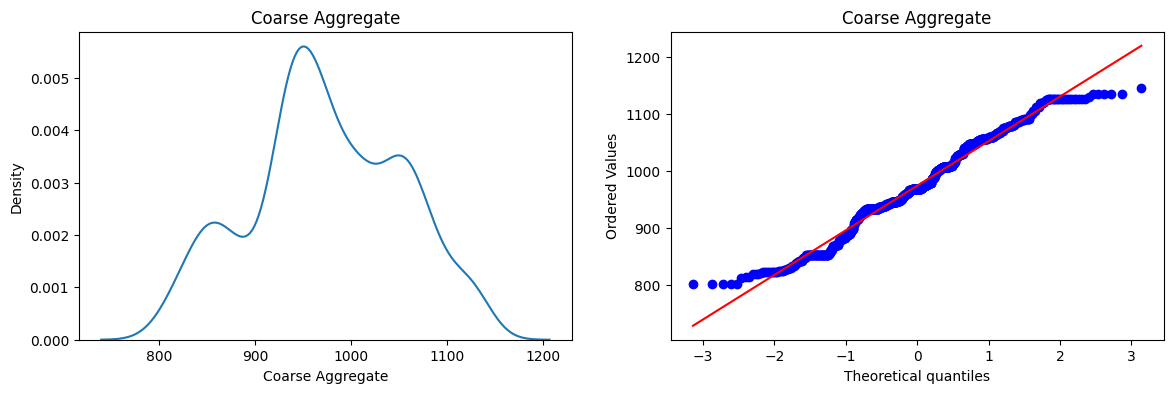

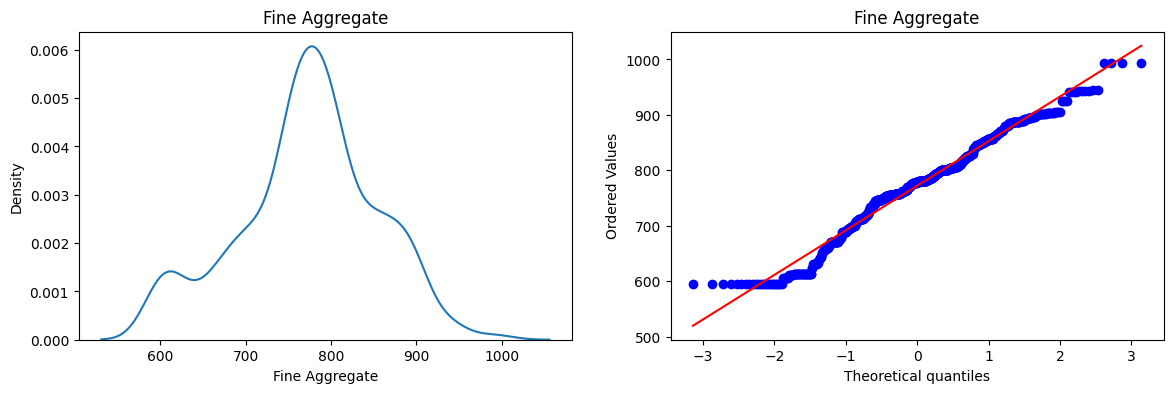

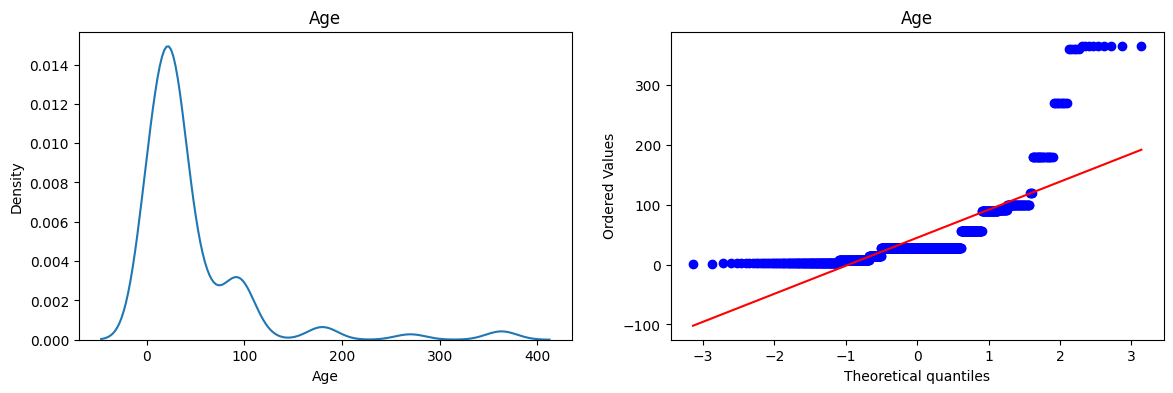

In [ ]:
for col in x_train.columns:
  plt.figure(figsize=(14,4))
  plt.subplot(121)
  sns.kdeplot(x=col, data=x_train)
  plt.title(col)

  plt.subplot(122)
  stats.probplot(x_train[col], dist='norm', plot=plt)
  plt.title(col)
  plt.show()

In [ ]:
pt = PowerTransformer(method='box-cox')

In [ ]:
x_train_trf = pt.fit_transform(x_train+0.000000001)
x_test_trf = pt.transform(x_test+0.0000000001)

In [ ]:
pt.lambdas_

array([ 0.17702535,  0.01911498, -0.02833657,  0.77268168,  0.07035332,
        1.12981301,  1.78201845,  0.06663097])

In [ ]:
x_train_trf = pd.DataFrame(x_train_trf, columns=x_train.columns)
x_test_trf = pd.DataFrame(x_test_trf, columns=x_test.columns)

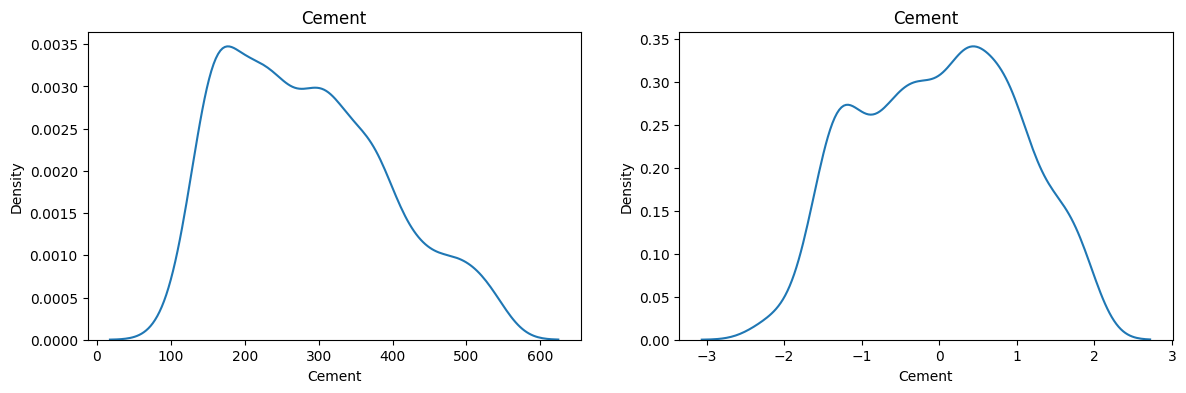

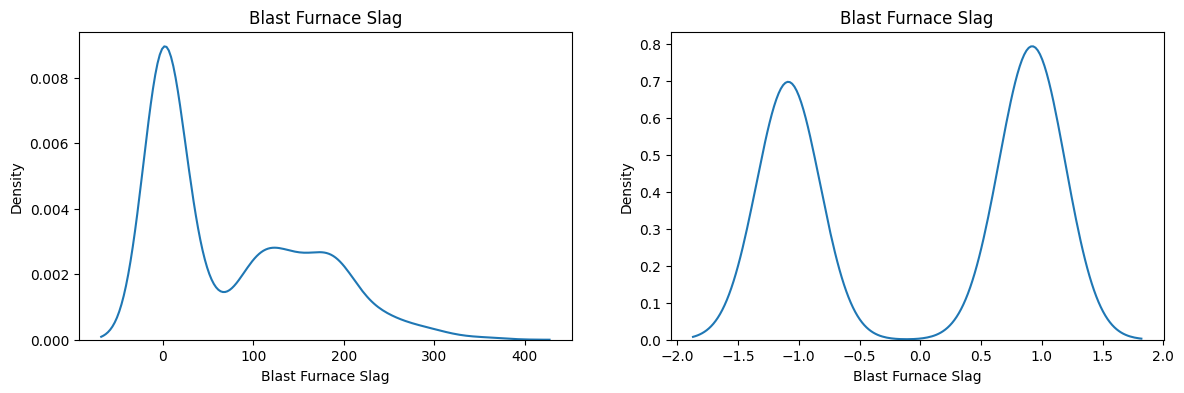

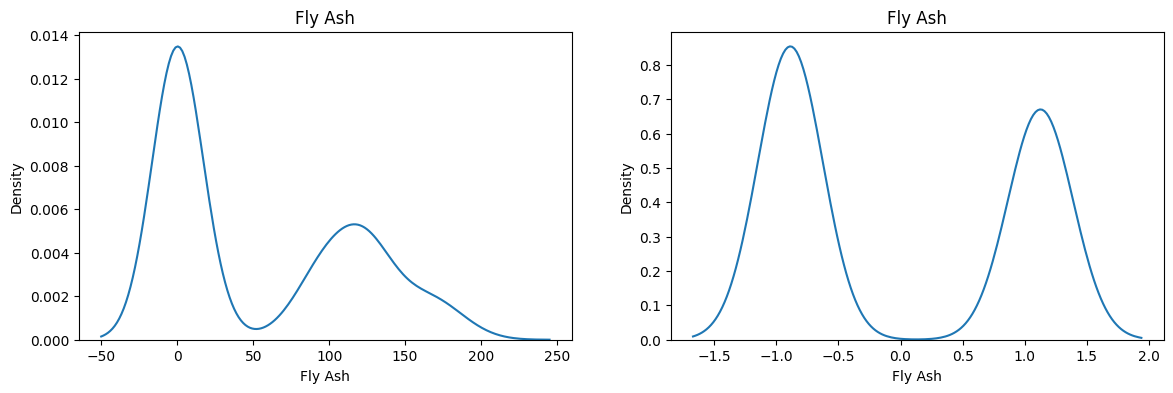

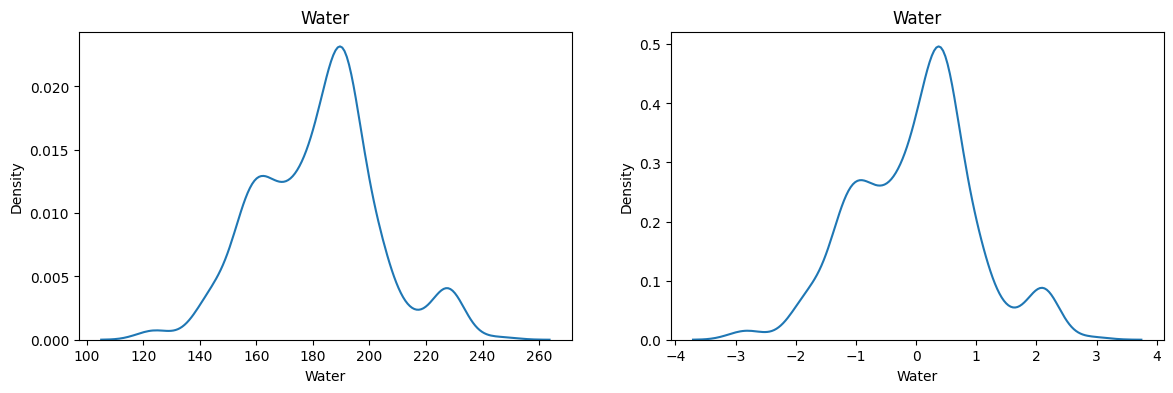

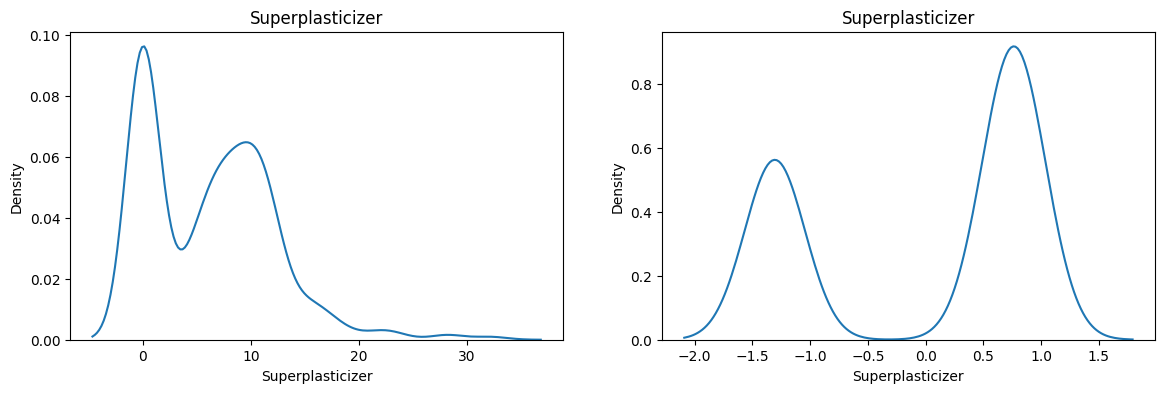

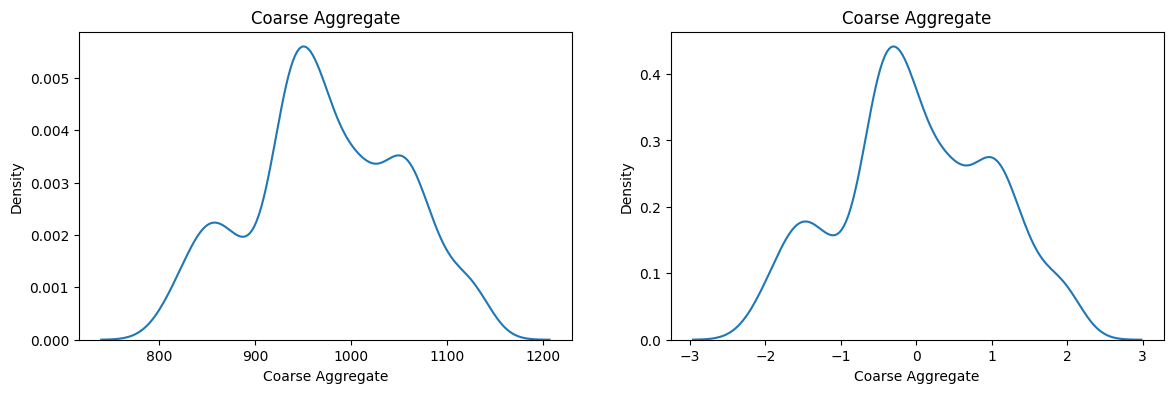

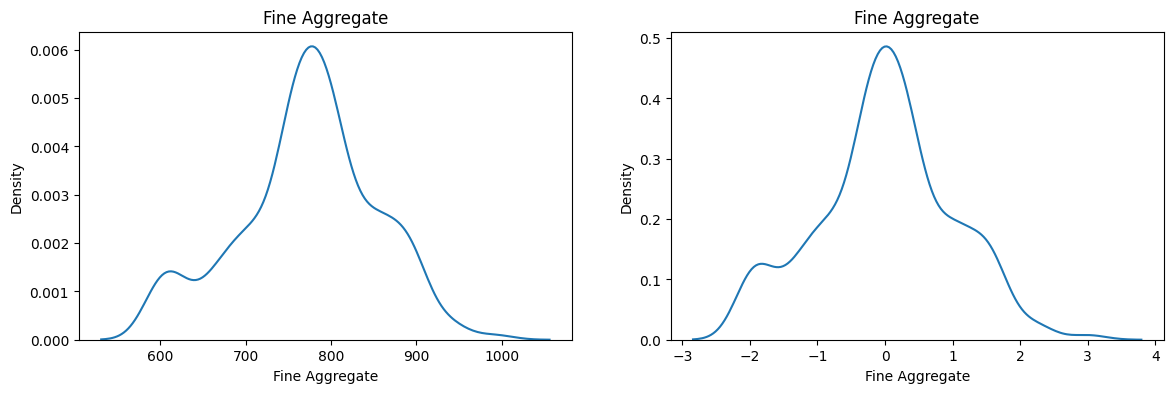

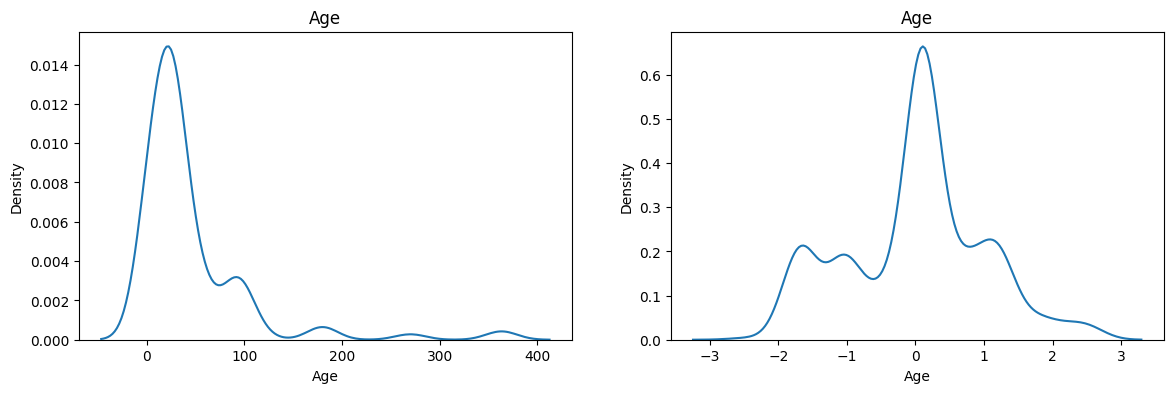

In [ ]:
for col in x_train_trf.columns:
  plt.figure(figsize=(14,4))

  plt.subplot(121)
  sns.kdeplot(x=col, data=x_train)
  plt.title(col)

  plt.subplot(122)
  sns.kdeplot(x=col, data=x_train_trf)
  plt.title(col)

  plt.show()

In [ ]:

lr = LinearRegression()
lr.fit(x_train_trf, y_train)

y_pred = lr.predict(x_test_trf)
r2_score(y_test, y_pred)

0.7992840192237016

In [ ]:
pt = PowerTransformer()

x_train_trf = pt.fit_transform(x_train)
x_test_trf = pt.transform(x_test)

x_train_trf = pd.DataFrame(x_train_trf, columns=x_train.columns)
x_test_trf = pd.DataFrame(x_test_trf, columns=x_test.columns)

lr = LinearRegression()
lr.fit(x_train_trf, y_train)

y_pred = lr.predict(x_test_trf)
r2_score(y_test, y_pred)

0.8161906512004999

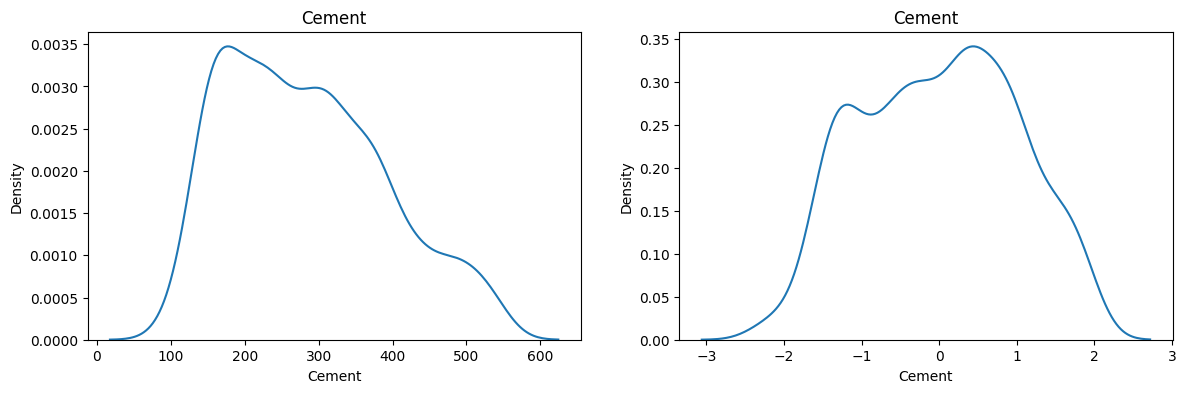

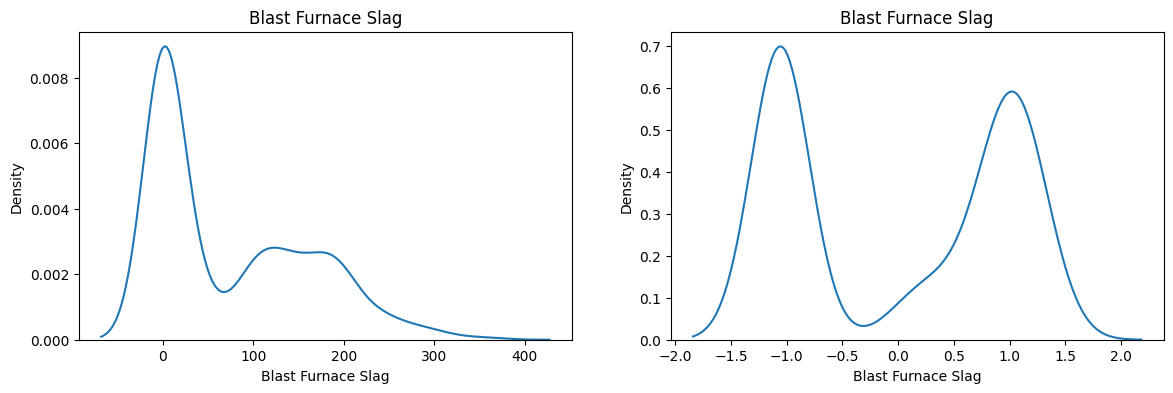

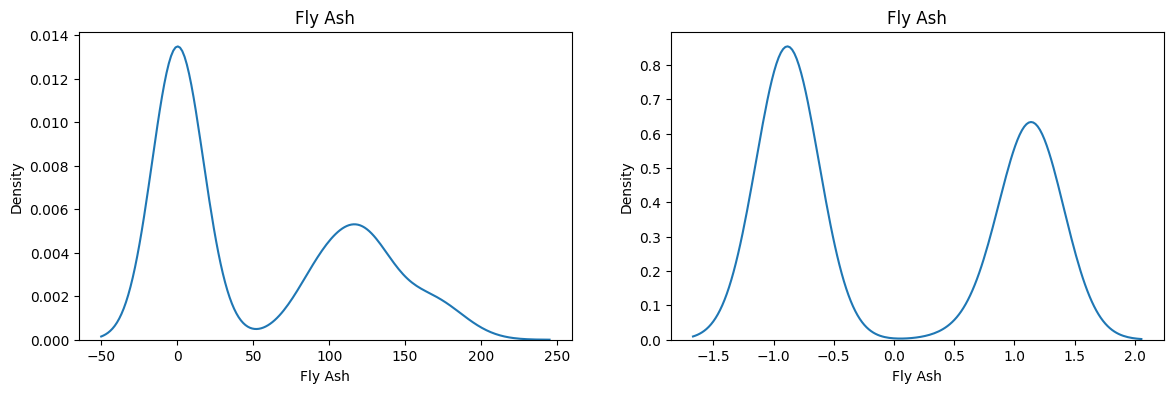

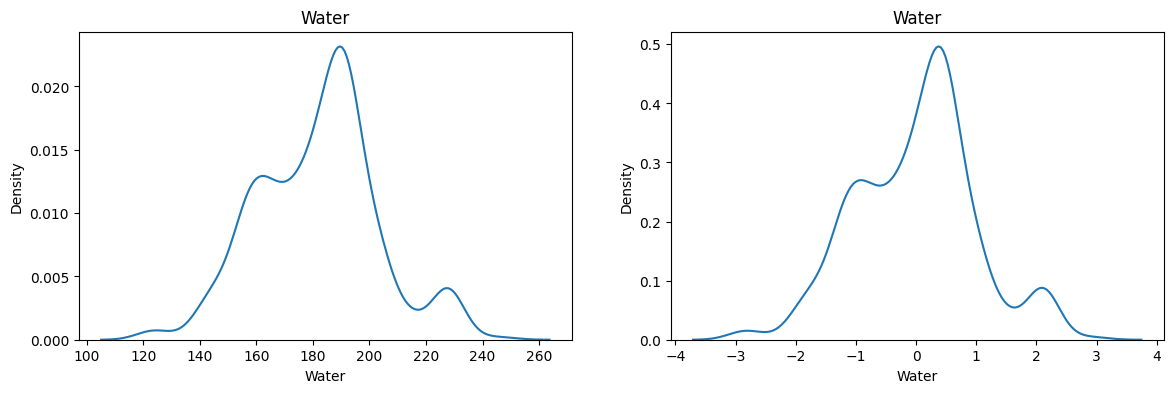

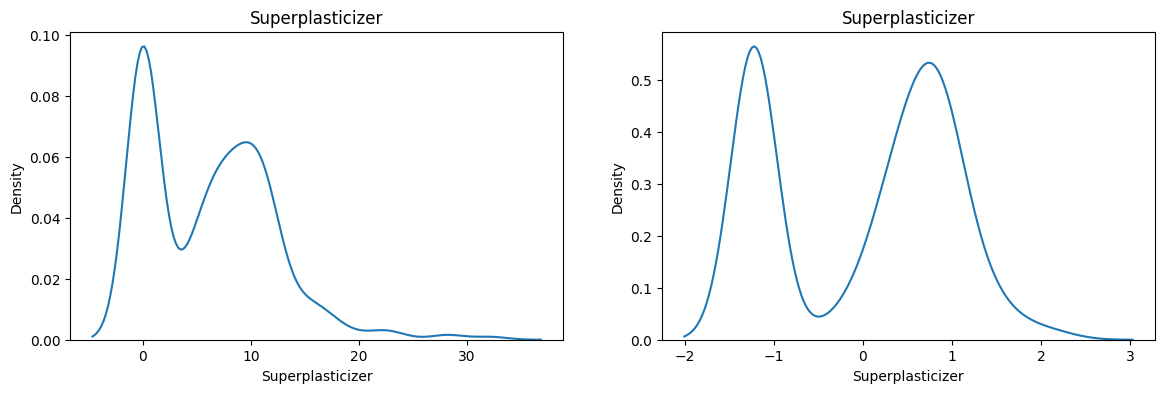

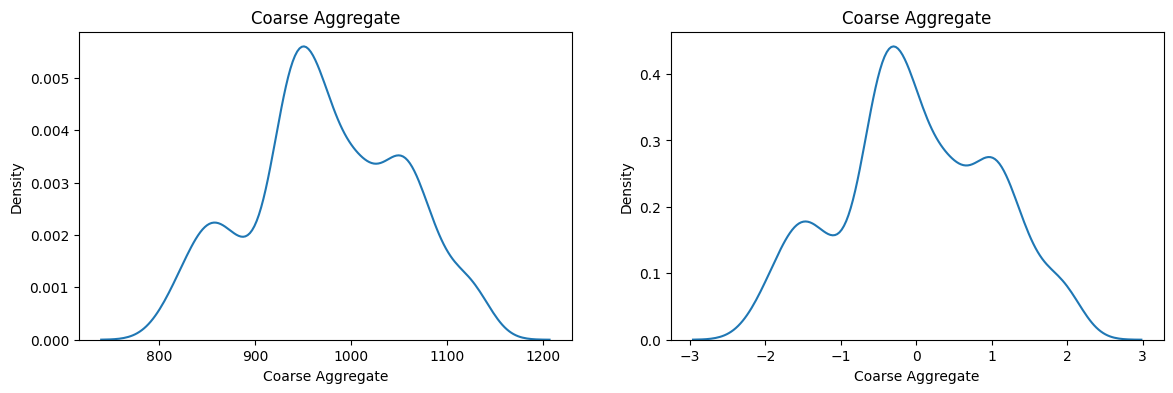

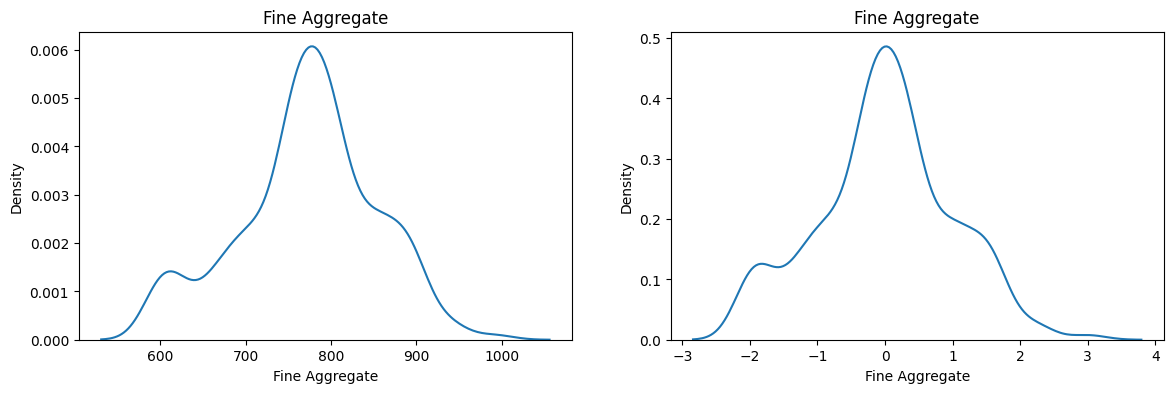

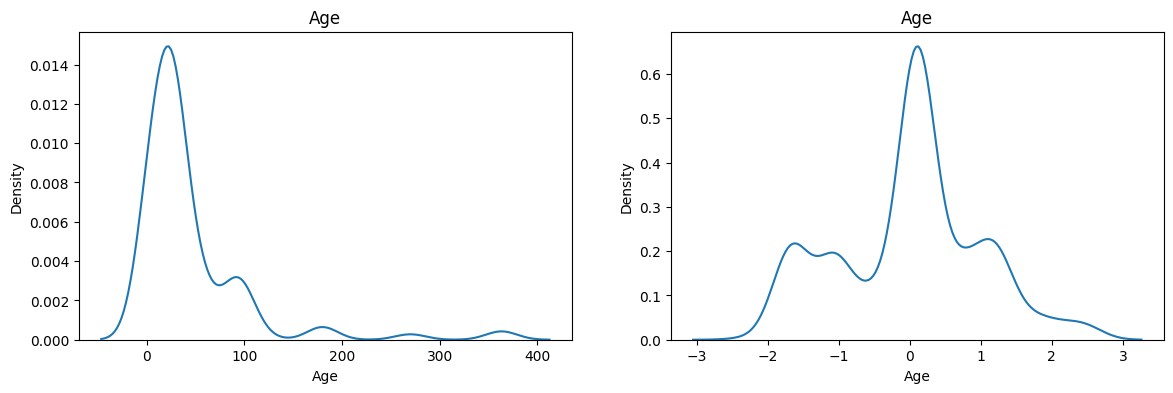

In [ ]:
for col in x_train_trf.columns:
  plt.figure(figsize=(14,4))

  plt.subplot(121)
  sns.kdeplot(x=col, data=x_train)
  plt.title(col)

  plt.subplot(122)
  sns.kdeplot(x=col, data=x_train_trf)
  plt.title(col)

  plt.show()

## Encoding Numerical Features

* Binning
  * Uniform binning
  * Uniform frequency binning or quantile
  * kmeans binning
* Binarization


In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
df = pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])
df.dropna(inplace=True)

In [ ]:
x = df.drop('Survived', axis=1)
y = df['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.6223776223776224

In [ ]:
kbin_age = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')

In [ ]:
trf = ColumnTransformer([
    ('first', kbin_age, ['Age']),
    ('second', kbin_fare, ['Fare'])
], remainder='passthrough')

x_train_trf = trf.fit_transform(x_train)
x_test_trf = trf.transform(x_test)

In [ ]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42, 14.  , 19.  , 22.  , 25.  , 28.5 , 32.  , 36.  , 42.  ,
              50.  , 80.  ])                                                ],
      dtype=object)

In [ ]:
pd.DataFrame(x_train_trf, columns=['Age', 'Fare'])

,Age,Fare
0,5.0,5.0
1,4.0,4.0
2,5.0,5.0
3,6.0,1.0
4,4.0,4.0
...,...,...
566,8.0,8.0
567,4.0,4.0
568,7.0,9.0
569,6.0,5.0


In [ ]:
clf = DecisionTreeClassifier()
clf.fit(x_train_trf, y_train)
y_pred = clf.predict(x_test_trf)
accuracy_score(y_test, y_pred)

0.6223776223776224

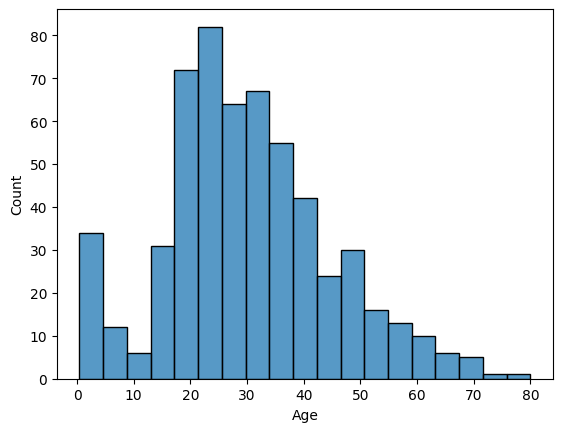

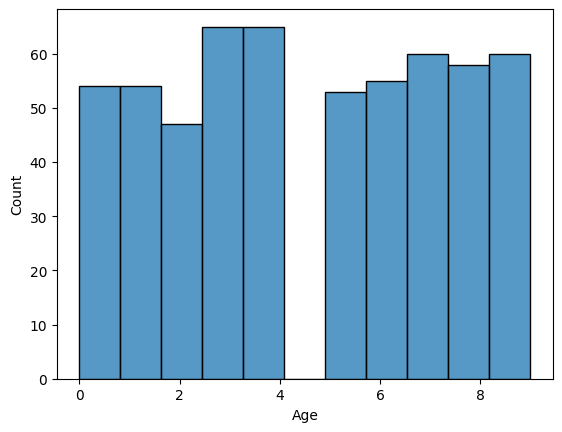

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(x='Age', data=x_train)
plt.show()

sns.histplot(x='Age', data=pd.DataFrame(x_train_trf, columns=['Age', 'Fare']))
plt.show()

In [ ]:
# Binarization

In [ ]:
from sklearn.preprocessing import Binarizer

### Mixed data

### Handling date and time


## Missing Values

* Remove row or column (CAA - complete case analysis)
* Impute
  * Univariate
    * Numerical
      * Mean
      * End of Distribution
      * Random
    * categorical
      * Mode
      * Missing
  * Multivariate
    * K means
    * Iterative imputer

In [ ]:
import pandas as pd

df = pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])

In [ ]:
df.isnull().sum()

,0
Survived,0
Age,177
Fare,0


In [ ]:
df.isnull().mean()

,0
Survived,0.000000
Age,0.198653
Fare,0.000000


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Survived', axis=1), df['Survived'], test_size=0.2, random_state=42)

In [ ]:
x_train.isnull().mean()

,0
Age,0.196629
Fare,0.000000


In [ ]:
mean_age = x_train['Age'].mean()

In [ ]:
x_train['Age_mean'] = x_train['Age'].fillna(mean_age)
x_test['Age_mean'] = x_test['Age'].fillna(mean_age)

In [ ]:
x_train['Age'].var()

210.2517072477435

In [ ]:
x_train['Age_mean'].var()

168.85193366872227

In [ ]:
median_age = x_train['Age'].median()

In [ ]:
x_train['Age_median'] = x_train['Age'].fillna(median_age)
x_test['Age_median'] = x_test['Age'].fillna(median_age)

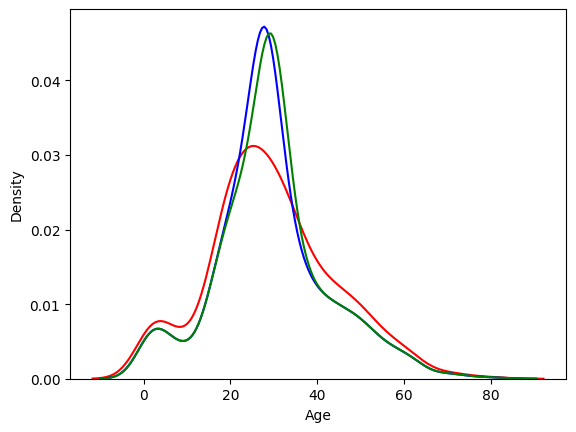

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(x_train['Age'], color='red')
sns.kdeplot(x_train['Age_median'], color='blue')
sns.kdeplot(x_train['Age_mean'], color='green')
plt.show()

In [ ]:
x_train.cov()

,Age,Fare,Age_mean,Age_median
Age,210.251707,71.580633,210.251707,210.251707
Fare,71.580633,2700.831981,57.485994,61.261919
Age_mean,210.251707,57.485994,168.851934,168.851934
Age_median,210.251707,61.261919,168.851934,169.207310


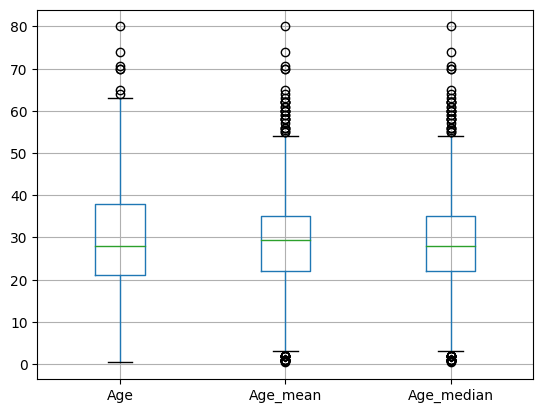

In [ ]:
x_train[['Age', 'Age_mean', 'Age_median']].boxplot()
plt.show()

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer1 = SimpleImputer(strategy='mean')

In [1]:
# NMAR - Not missing at random
# MCAR - Missing completely at random

In [4]:
# Handling categorical missing data
# - Most frequent missing imputation
# - Create new category (missing)

In [5]:
# Random imputation

In [8]:
# Multivariate
# - Knn
# - Iterative/ Mice (Multivariate imputation by chained equations)